<a href="https://www.kaggle.com/code/sonnetsaif/stock-prediction-forecasting-using-stacked-lstm?scriptVersionId=107491252" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/microsoftcorporation/MSFT.csv


In [2]:
import tensorflow as tf
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv("../input/microsoftcorporation/MSFT.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061252,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063439,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064533,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062892,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061799,47894400


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
9089,2022-04-04,310.089996,315.109985,309.709991,314.970001,314.970001,24289600
9090,2022-04-05,313.269989,314.869995,309.869995,310.880005,310.880005,23156700
9091,2022-04-06,305.190002,307.000000,296.709991,299.500000,299.500000,40110400
9092,2022-04-07,296.660004,303.649994,296.350006,301.369995,301.369995,31411200
9093,2022-04-08,300.440002,301.119995,296.279999,296.970001,296.970001,24347400


In [5]:
df1=df.reset_index()['Close']
df1

0         0.097222
1         0.100694
2         0.102431
3         0.099826
4         0.098090
           ...    
9089    314.970001
9090    310.880005
9091    299.500000
9092    301.369995
9093    296.970001
Name: Close, Length: 9094, dtype: float64

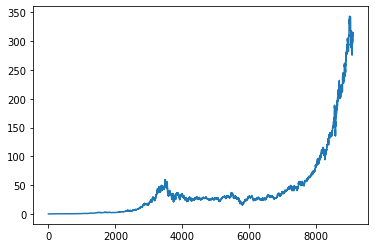

In [6]:
plt.plot(df1)

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [8]:
print(df1)

[[2.02437349e-05]
 [3.03656023e-05]
 [3.54294513e-05]
 ...
 [8.72864491e-01]
 [8.78316058e-01]
 [8.65488825e-01]]


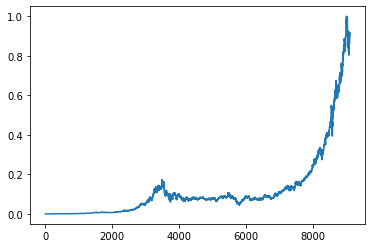

In [9]:
plt.plot(df1)    

In [10]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

training_size,test_size

(5911, 3183)

In [11]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [12]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [13]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(ytest.shape)

(5810, 100)
(5810,)
(3082, 100)
(3082,)


In [14]:
# reshape input to be [samples, time steps, features]
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [16]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

model.summary()

2022-10-08 11:46:00.465393: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=50, batch_size=64,verbose=1)

Epoch 1/50


2022-10-08 11:46:01.400976: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


91/91 [==============================] - 33s 293ms/step - loss: 2.1948e-04 - val_loss: 0.0026
Epoch 2/50
91/91 [==============================] - 26s 282ms/step - loss: 1.9338e-05 - val_loss: 0.0032
Epoch 3/50
91/91 [==============================] - 26s 282ms/step - loss: 1.7859e-05 - val_loss: 0.0038
Epoch 4/50
91/91 [==============================] - 26s 282ms/step - loss: 1.5850e-05 - val_loss: 0.0042
Epoch 5/50
91/91 [==============================] - 26s 281ms/step - loss: 1.4834e-05 - val_loss: 0.0039
Epoch 6/50
91/91 [==============================] - 25s 275ms/step - loss: 1.4050e-05 - val_loss: 0.0038
Epoch 7/50
91/91 [==============================] - 26s 285ms/step - loss: 1.5654e-05 - val_loss: 0.0040
Epoch 8/50
91/91 [==============================] - 26s 281ms/step - loss: 1.1832e-05 - val_loss: 0.0036
Epoch 9/50
91/91 [==============================] - 26s 281ms/step - loss: 1.1194e-05 - val_loss: 0.0034
Epoch 10/50
91/91 [==============================] - 26s 284ms/ste

In [18]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [19]:
# Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [20]:
print(math.sqrt(mean_squared_error(y_train,train_predict)))
print(math.sqrt(mean_squared_error(ytest,test_predict)))

21.61623074136651
115.18595509715644


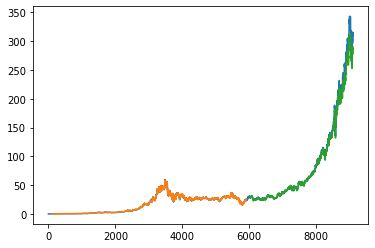

In [21]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [22]:
len(test_data)

3183

In [23]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 2842)

In [24]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()